# **Atividade 2 - Laboratório de Controle**

# Revisão Teórica

<p align = 'justify'>Toda Função de Transferência $G(s) = \dfrac{Y(s)}{X(s)}$ de primeira ordem pode ser escrita como

$$ G(s) = \frac{K}{\tau s + 1}  \tag{1} $$

Suponha que $G(s)$ é estavel, ou seja, $\tau > 0$. Considere uma entrada $x(t) = A u(t)$, em que $u(t)$ é do tipo degrau unitário e $A$ uma constante. Temos que a saída correspondente é:

$$y(t) = K A (1 - e^{ - \frac{t}{\tau}}), ~\forall t \geq 0. \tag{2}$$

O valor da saída em regime permanente ($t \rightarrow \infty $) é

$$ y(\infty) = K A \tag{3}$$

e o instante de tempo $t_0$ para que se atinja $63\%$ de $y(\infty)$ é dado por

$$ 0,6321 K A = K A (1 - e^{ - \frac{\tau}{\tau}}) = \tau \tag{4}$$

Logo,

$$ K = \frac{y(\infty)}{A} $$

e 

$$ \tau = t(63\%) $$

</p>

# **Resposta ao Degrau**

**Revisão Teórica**

Considere o sistema de 1º Ordem:

$$ G(s) = \frac{\Delta Y(s)}{\Delta X(s)} =  \frac{K_m}{\tau s + 1 } \tag{1}$$

Em que $\Delta Y(s)$ é a variação do sinal de saída e $\Delta X(s)$ é a variação do sinal de entrada. As constantes $K_m$ e $\tau$ representam o ganho e a constante de tempo do sistema, respectivamente.

A resposta do sistema para uma variação do tipo degrau com amplitude $A$ no domínio do tempo, é dada pela expressão:

$$ \Delta y(t) = A K_m (1- e^{-\frac{t}{\tau}})u(t) \tag{2}$$
em que $u(t)$ é o degrau.

Observe que a resposta do sistema para o instante de tempo correspondente a uma constante de tempo é, $t = \tau$

$$ \Delta y( \tau ) = A K_m (1- e^{-\frac{ \tau }{ \tau }}) = 0,6321 A K_m \tag{3}$$

O que implica na seguinte interpretação, para uma variação do tipo degrau de amplitude $A$ na entrada do sistema de primeira ordem, a amplitude correspondente na saída decorridos uma constante de tempo após a variação na entrada é $63,21 \%$ do ganho do sistema $K_m$ vezes a amplitude da entrada $A$.  



**Código 1**

O código gera o gráfico no tempo da resposta do sistema .

In [104]:
# ________________ CARREGA BIBLIOTECAS __________#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *

**Ganho do Sistema**

Observa-se que, em regime permanente, a resposta $\Delta y( \infty ) \rightarrow A K_m $. Assim, o ganho do sistema pode ser estimado a partir de uma resposta ao degrau.

$$ K_m = \frac{\Delta y(t) }{\Delta x(t)} = \frac{y(\infty) - y(0^-)}{A} \tag{4}$$

em que $\Delta y(t)$ corresponde a variação obervada no sinal de saída, com $y(\infty)$ sendo a resposta em regime permanente e $y(0^-)$ o valor da resposta antes da excitação. O $\Delta x(t)$ é a variação de amplitude do sinal de entrada.

**Constante de tempo**

A resposta do sistema para uma constante de tempo assume o valor de $\Delta y(\tau) = A K_m 0,6321$. Logo, de posse da resposta ao degrau é possível estimar o valor da constante de tempo.

Basta seguir os seguintes passos:

1) Identifique na resposta ao degrau o valor de regime permanente;

2) Calcule $63,21 \% $ do valor de regime permanente;

3) Some ao valor da resposta antes do grau ter sido aplicado o valor calculado no item 2)



# **Ponto de Operação**

In [105]:
dados = pd.read_csv("Dados02.csv", header = None, sep=";").values

In [106]:
tempo = dados[:,0]
sinal_entrada  = dados[:,1]
sinal_saida = dados[:,2]

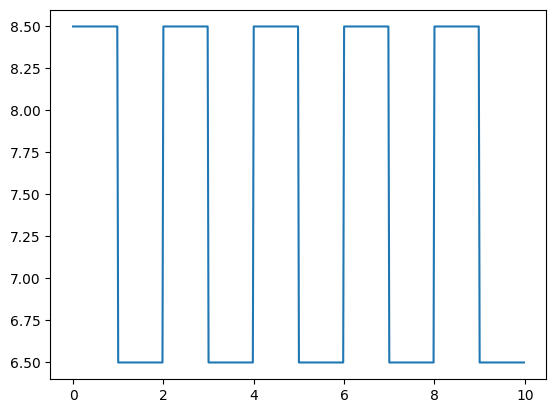

In [107]:
plt.plot(tempo, sinal_entrada)

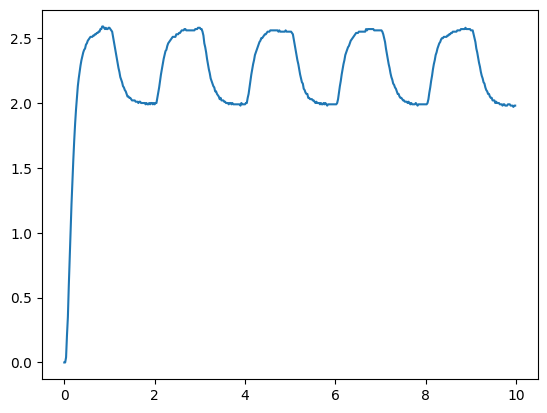

In [108]:
plt.plot(tempo, sinal_saida)

In [109]:
maxin = max(sinal_entrada[200:600])
minin = min(sinal_entrada[200:600])
maxout = max(sinal_saida[200:600])
minout = min(sinal_saida[200:600])

Amaxin = []
Aminin = []
Amaxout = []
Aminout = []

for t in tempo:
    Aminin += [minin]
for t in tempo:
    Aminout += [minout]
for t in tempo:
    Amaxin += [maxin]
for t in tempo:
    Amaxout += [maxout]

janela = (tempo>2) & (tempo<14)
NDCin = np.mean(sinal_entrada[janela])
NDCout = np.mean(sinal_saida[janela])

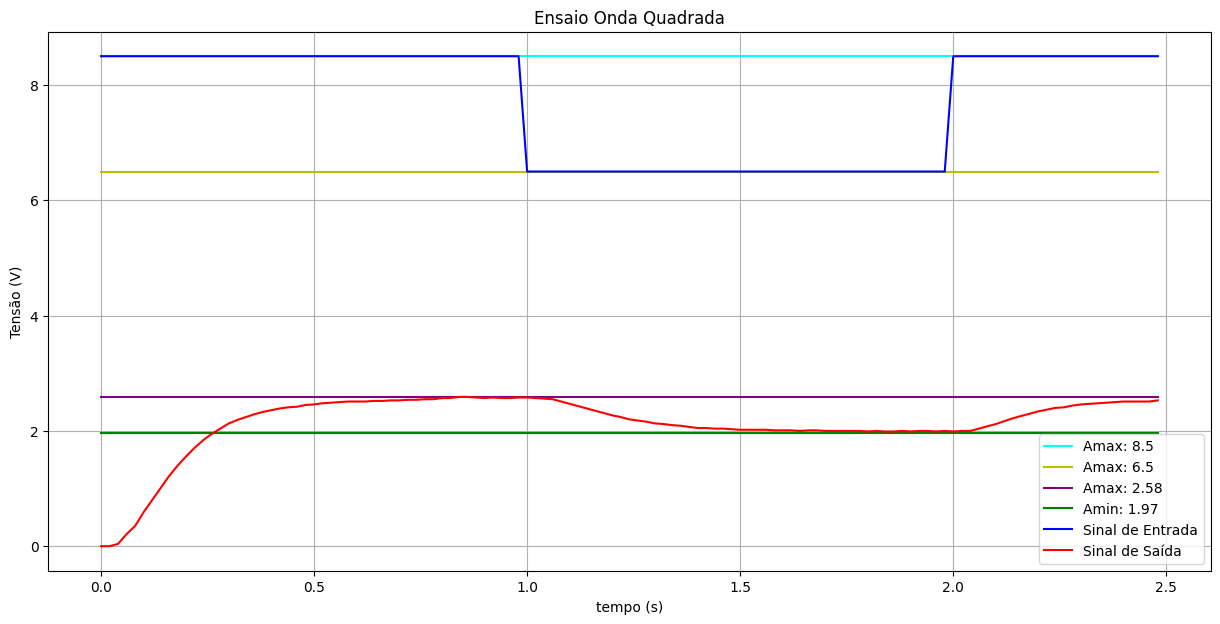

In [110]:
plt.figure(figsize=(15,7))
lim = int(len(tempo)*(25/100)) # Definindo o limite do gráfico como 25% do total
plt.plot(tempo[0:lim], Amaxin[0:lim], c = "cyan", label = f"Amax: {maxin}")
plt.plot(tempo[0:lim], Aminin[0:lim], c = "y", label = f"Amax: {minin}")
plt.plot(tempo[0:lim], Amaxout[0:lim], c = "purple", label = f"Amax: {maxout}")
plt.plot(tempo[0:lim], Aminout[0:lim], c = "g", label = f"Amin: {minout}")
plt.plot(tempo[0:lim], sinal_entrada[0:lim], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[0:lim], sinal_saida[0:lim],   c = 'r', label = "Sinal de Saída")

plt.title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

# Análise da Resposta Transitória

1. A partir do ensaio, desprezar os instantes iniciais;
2. Remover o nível DC dos sinais coletados;


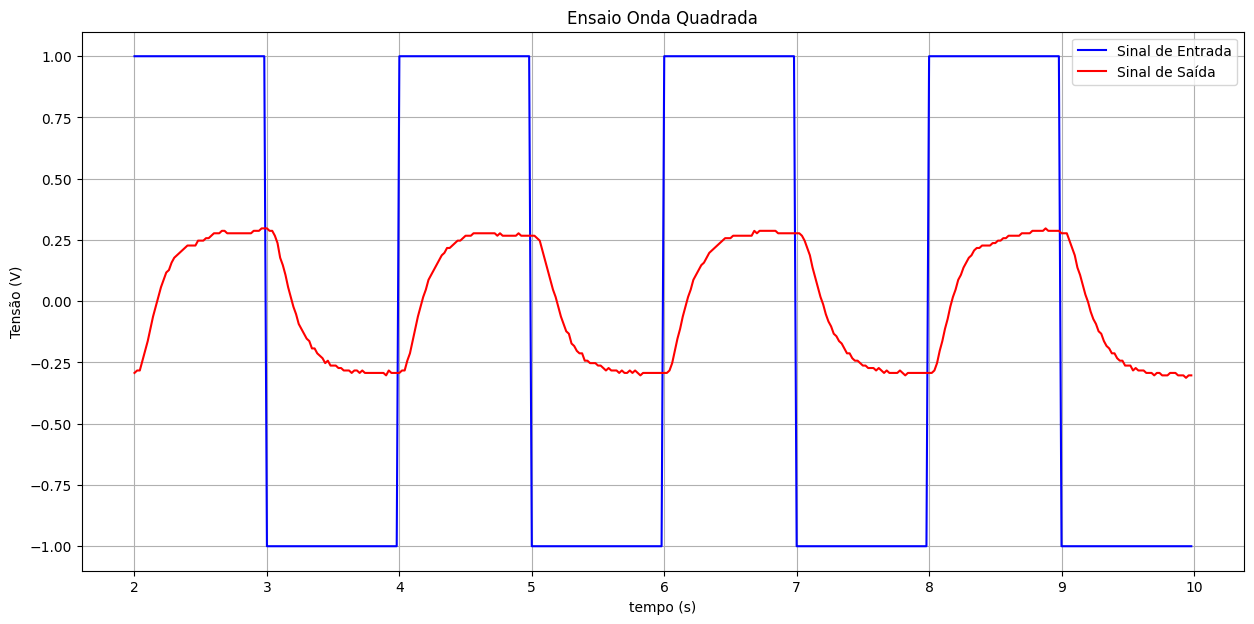

Nivel DC entrada: 7.5
Nivel DC saída: 2.282675


In [111]:
# ________________ Define janela que despreza os primeiros instantes do ensaio __________#

janela = (tempo>2) & (tempo<14)

nivel_dc_entrada = np.mean(sinal_entrada[janela])
nivel_dc_saida = np.mean(sinal_saida[janela])

# ________________ Remove Nivel DC da Entrada e da Saída __________#

r = sinal_entrada - nivel_dc_entrada
y = sinal_saida - nivel_dc_saida

plt.figure(figsize=(15,7))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela],y[janela], c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

print("Nivel DC entrada:" , nivel_dc_entrada )
print("Nivel DC saída:" , nivel_dc_saida )

In [112]:
# ________________ Define o intervalo de tempo entre os instantes 3.9 e 5.1 segundos __________#
valores = []
index = (tempo>3.9)&(tempo<5.1)
for t, s in zip(tempo, y):
    if t > 3.9 and t < 5.1:
        valores += [s]

minimo = min(valores)
maximo = max(valores)

const = 0.6321 * maximo

for t, s in zip(tempo, y):
    if t > 3.9 and t < 4.5:
        if s == minimo:
            ponto1 = t 
            
for t, s in zip(tempo, y):
    if t > 3.9 and t < 4.5:
        if s > 0.95*const and s < 1.05*const:
            ponto2 = t


Estimativa do ganho $K_m$, utilizando Equação (4)

In [113]:
Km = (maximo - minimo )/ 2
print(f"{Km:.3}")

0.29


In [114]:
# ________________ Simulação do Modelo Determinado __________#

erros = []      # Variável para armazenar os valores do erro RMS
indices = []    # Variável para armazenar os valores de tempo inicial
i = 0

# Cacula o erro RMS para diferentes valores de tempo incial
while i < 0.2:
    Kt = ponto2 - (ponto1 + i)
    num = [Km]
    den = [Kt, 1]
    G = ct.tf(num,den)
    _,ym = ct.forced_response(G,T = tempo, U = r)
    erro_rms = (np.sum((ym[janela] - sinal_saida[janela])**2)/np.size(sinal_saida[janela]))
    indices += [i]
    erros += [erro_rms]
    i += 0.001

# Escolhe o melhor tempo inicial, com base no menor erro RMS
for i, erro in zip(indices, erros):
    if erro == min(erros):
        tt = i

# Calcula o ganho em malha fechada
Kt = ponto2 - (ponto1 + tt)
num = [Km]
den = [Kt, 1]
G = ct.tf(num,den)
_,ym = ct.forced_response(G,T = tempo, U = r)
erro_rms = (np.sum((ym[janela] - sinal_saida[janela])**2)/np.size(sinal_saida[janela]))
print(f"tt = {tt:.4f}")

tt = 0.1660


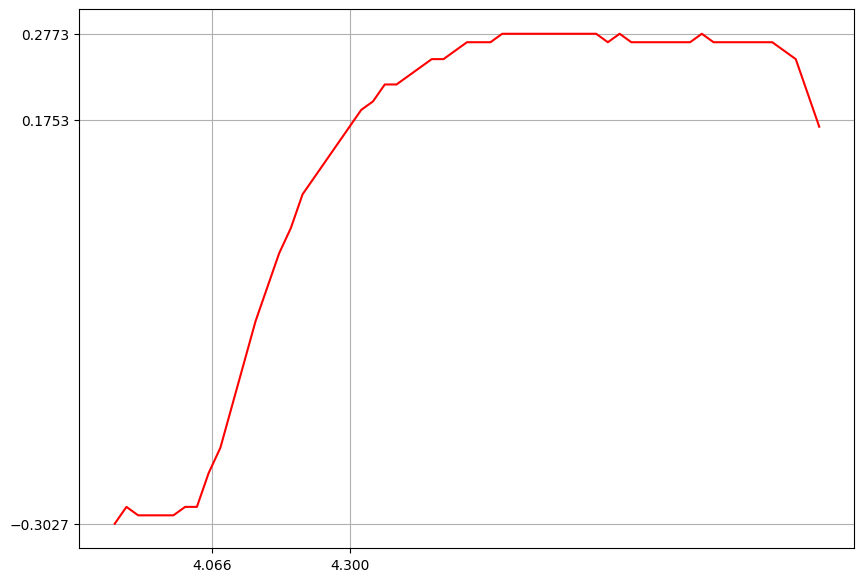

In [115]:
# Plota o gráfico em um único período
plt.figure(figsize = (10,7))
plt.plot(tempo[index], y[index], 'r')
plt.yticks([minimo, const , maximo])
plt.xticks([ponto1 + tt, ponto2])
plt.grid()
plt.show()

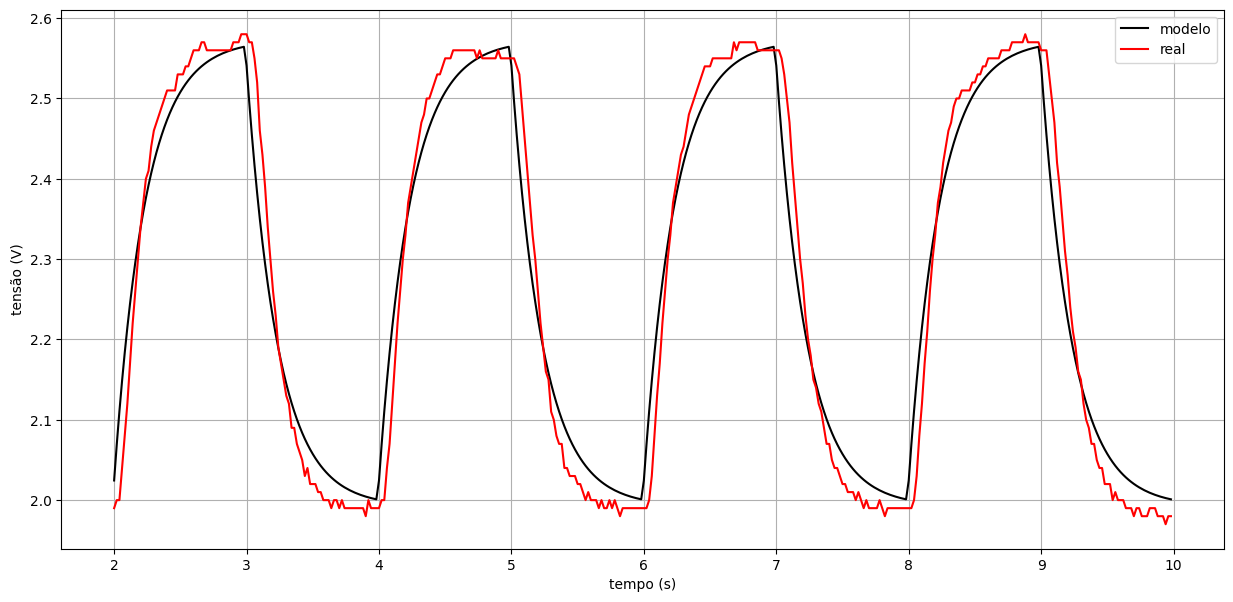

Erro RMS: 2.283103635431934


In [116]:
# ________________ Plotando o gráfico do Modelo Determinado __________#

plt.figure(figsize=(15,7))
plt.plot(tempo[janela], ym[janela] + nivel_dc_saida ,'k', label = 'modelo')
plt.plot(tempo[janela], sinal_saida[janela] ,'r', label = 'real')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend()
plt.grid()
plt.show()

erro_rms = (np.sum((ym[janela] - sinal_saida[janela])**2)/np.size(sinal_saida[janela]))
print("Erro RMS:", np.sqrt(erro_rms))

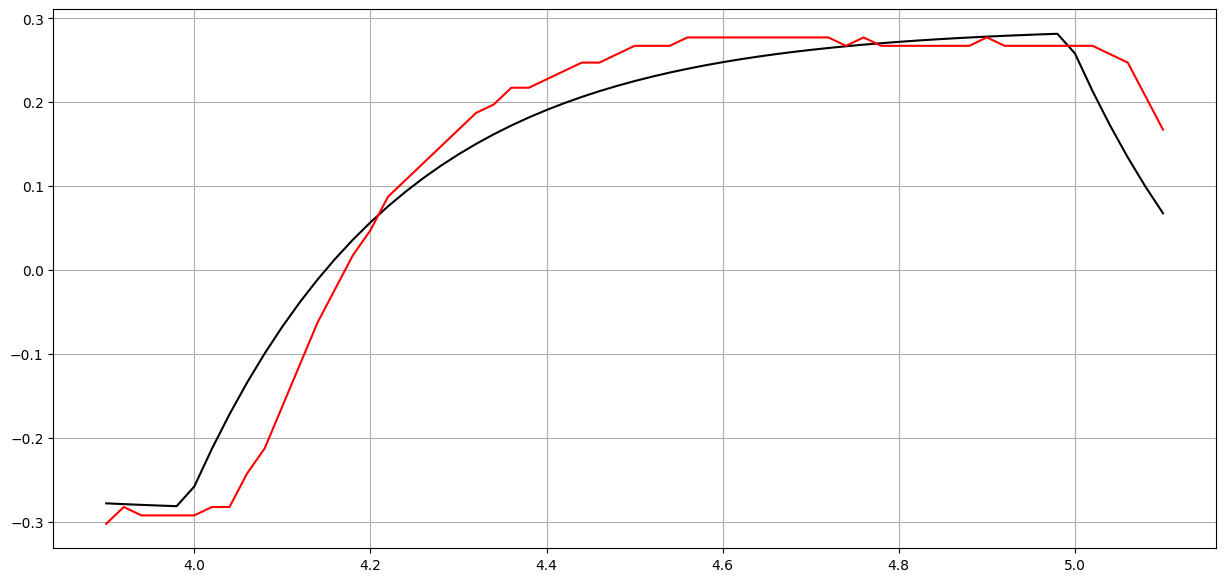

In [117]:
# ________________ Define o intervalo de tempo entre os instantes 3.9 e 5.1 segundos __________#

index = (tempo>3.9)&(tempo<5.1)

plt.figure(figsize=(15,7))
plt.plot(tempo[index],ym[index],'k',tempo[index],y[index],'r')
plt.grid()
plt.show()